In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [93]:
master_df = pd.read_csv('./loan.csv',low_memory=False)
master_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1.Data Interpretation 

#### Assumed important columns :
##### <font color = 'blue'>loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,</font>
##### <font color = 'blue'>emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,</font>
##### <font color = 'blue'>purpose,title,addr_state,dti,mths_since_last_delinq,open_acc,total_acc,pub_rec_bankruptcies </font>
#### Target column:
##### <font color = 'blue'>loan_status</font>

In [94]:
df = master_df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','desc','purpose','title','addr_state','dti','mths_since_last_delinq','open_acc','total_acc','pub_rec_bankruptcies'
]]
print(df.shape)
df.head(2)

(39717, 24)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,desc,purpose,title,addr_state,dti,mths_since_last_delinq,open_acc,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,NaN,3,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,NaN,3,4,0.0


### Removing records of <font color='blue'> loan_status = Current</font>

In [95]:
df = df[df['loan_status'] != 'Current']
df.shape

(38577, 24)

# 2.Data Cleaning and Manipulation

## 2.1 Null Check on Columns

In [96]:
df_cols_null_percentage = (df.isnull().sum()*100/filtered_df.size)
print(df_cols_null_percentage)

loan_amnt                 0.000000
funded_amnt               0.000000
funded_amnt_inv           0.000000
term                      0.000000
int_rate                  0.000000
installment               0.000000
grade                     0.000000
sub_grade                 0.000000
emp_title                 0.250313
emp_length                0.108371
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
issue_d                   0.000000
loan_status               0.000000
desc                      1.314194
purpose                   0.000000
title                     0.001154
addr_state                0.000000
dti                       0.000000
mths_since_last_delinq    2.612756
open_acc                  0.000000
total_acc                 0.000000
pub_rec_bankruptcies      0.073122
dtype: float64


##### <font color='blue'>Max missing values percentage found for columns : 2.69% .Further columns filtering may not be required as it is not significant.</font>

## 2.2 Null check on Rows

In [97]:
df_rows_null_percentage = (df.isnull().sum(axis=1)*100/24)
df_rows_null_percentage.describe()

count    38577.000000
mean         4.488750
std          3.157415
min          0.000000
25%          4.166667
50%          4.166667
75%          8.333333
max         16.666667
dtype: float64

#### <font color='blue'>Max missing values percentage found = 16.67%. Further rows filtering may not be required</font>

## 2.3 Columns type check and convert if required

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_title               36191 non-null  object 
 9   emp_length              37544 non-null  object 
 10  home_ownership          38577 non-null  object 
 11  annual_inc              38577 non-null  float64
 12  verification_status     38577 non-null  object 
 13  issue_d                 38577 non-null  object 
 14  loan_status             38577 non-null

#### Removing <font color = 'blue'>months</font> text from <font color = 'blue'>term</font>  column and convert into int

In [99]:
df.loc[:,'term'] = df['term'].apply(lambda a: int(str(a).strip()[0:2]))
df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

#### Removing <font color = 'blue'>%</font> text from <font color = 'blue'>int_rate</font>  column

In [100]:
df.loc[:,['int_rate']] = df['int_rate'].apply(lambda a: float(a[:-2]))
df['int_rate'].value_counts()

13.4    1170
10.9    1022
11.4    1005
10.3     994
9.9      966
        ... 
21.8       2
22.9       1
21.4       1
24.4       1
22.6       1
Name: int_rate, Length: 167, dtype: int64

# 3.Derive new columns

#### <font color = 'blue'>Default</font>. If the applicant has defaulted the loan with values 0 or 1
#### <font color = 'blue'>Annual income binning</font>. Segregate the applicants as per their annual income
#### <font color = 'blue'>Loan Annual Income ratio</font>. Ratio of loan to annual income of applicant

## 3.1 Default

In [101]:
df['default'] = df['loan_status'].apply(lambda a : 0 if a.strip() == 'Fully Paid' else 1)
df.default.value_counts()

0    32950
1     5627
Name: default, dtype: int64

## 3.2 Annual Income Binning

In [102]:
annual_inc_range_order = ['Very Low','Low','Medium','High','Very High']
def binning(income):
    if income < 20000.00 :
        return 'Very Low'
    elif income < 40000.00 :
        return 'Low'
    elif income < 80000.00 :
        return 'Medium'
    elif income < 120000.00 :
        return 'High'
    else :
        return 'Very High'
df['annual_inc_range'] = df['annual_inc'].apply(binning)
df['annual_inc_range'].value_counts()

Medium       19103
Low           7785
High          6996
Very High     3635
Very Low      1058
Name: annual_inc_range, dtype: int64

## 3.3 Loan To Annual Income Ratio

In [103]:
df['loan_to_annual_income'] = df['loan_amnt']*100/df['annual_inc']
df['loan_to_annual_income'].describe()

count    38577.000000
mean        18.583348
std         11.524268
min          0.078947
25%          9.803922
50%         16.304348
75%         25.000000
max         83.000000
Name: loan_to_annual_income, dtype: float64

<AxesSubplot:>

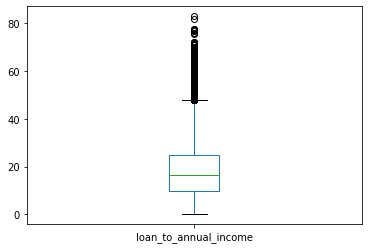

In [104]:
df['loan_to_annual_income'].plot.box()

#### <font color='blue'> Since loan_to_annual_income ration maximum is 83% we are making below assumptions for binning the ratio </font>
#### <font color = 'blue'>Loan to annual income ratio binning :</font> Very Low(<10%),Low(10%-40%),Medium (40%-60%),High(60%-100%),Very High(>100%)

In [105]:
def ratioBinning(ratio):
    if ratio < 10.00 :
        return 'Very Low'
    elif ratio < 40.00 :
        return 'Low'
    elif ratio < 60.00 :
        return 'Medium'
    elif ratio < 100.00 :
        return 'High'
    else :
        return 'Very High'
    
df['loan_to_annual_inc_range'] = df['loan_to_annual_income'].apply(ratioBinning)
df['loan_to_annual_inc_range'].value_counts()

Low         26516
Very Low     9794
Medium       2165
High          102
Name: loan_to_annual_inc_range, dtype: int64

# 4.Analysis

## 4.1 Univariate Analysis

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38577 non-null  int64  
 1   funded_amnt               38577 non-null  int64  
 2   funded_amnt_inv           38577 non-null  float64
 3   term                      38577 non-null  int64  
 4   int_rate                  38577 non-null  float64
 5   installment               38577 non-null  float64
 6   grade                     38577 non-null  object 
 7   sub_grade                 38577 non-null  object 
 8   emp_title                 36191 non-null  object 
 9   emp_length                37544 non-null  object 
 10  home_ownership            38577 non-null  object 
 11  annual_inc                38577 non-null  float64
 12  verification_status       38577 non-null  object 
 13  issue_d                   38577 non-null  object 
 14  loan_s

### 4.1.1  term,verification status and home ownership

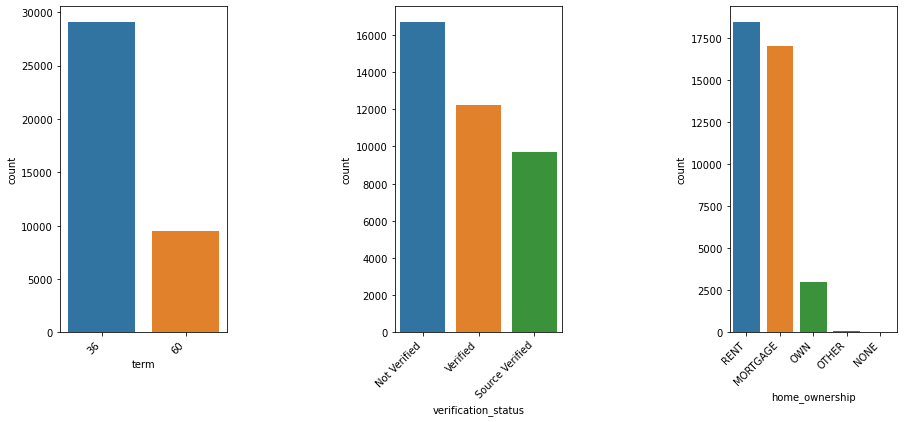

In [107]:
def plotCountsOnY(predictors):
        
        fig, axs = plt.subplots(ncols = 3,figsize=(15,6))
        fig.subplots_adjust(hspace=1, wspace=1)
        for i,col in enumerate(predictors):
                a = sns.countplot(x=col, data=df,ax=axs[i],order = df[col].value_counts().sort_values(ascending=False).index)
                a.set_xticklabels(a.get_xticklabels() ,rotation=45,horizontalalignment='right')
        fig.show()  

plotCountsOnY(['term','verification_status','home_ownership'])

### 4.1.2 Grade

<AxesSubplot:xlabel='grade', ylabel='count'>

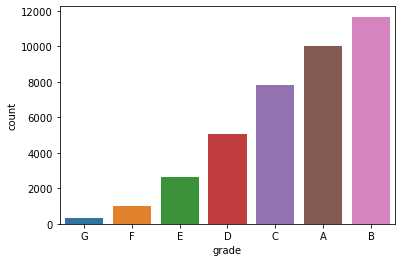

In [108]:
sns.countplot(x="grade", data=df,order = df['grade'].value_counts().sort_values(ascending=True).index)

### 4.1.3 Employee working experience

Text(0.5, 0, 'Employee Experience')

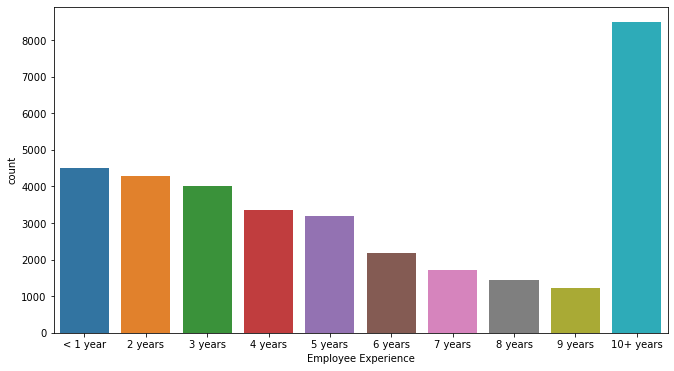

In [109]:
order = ['< 1 year','2 years', '3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize=(11,6))
sns.countplot(x="emp_length", data=df,order = order)
plt.xlabel('Employee Experience')

### 4.1.4 Purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

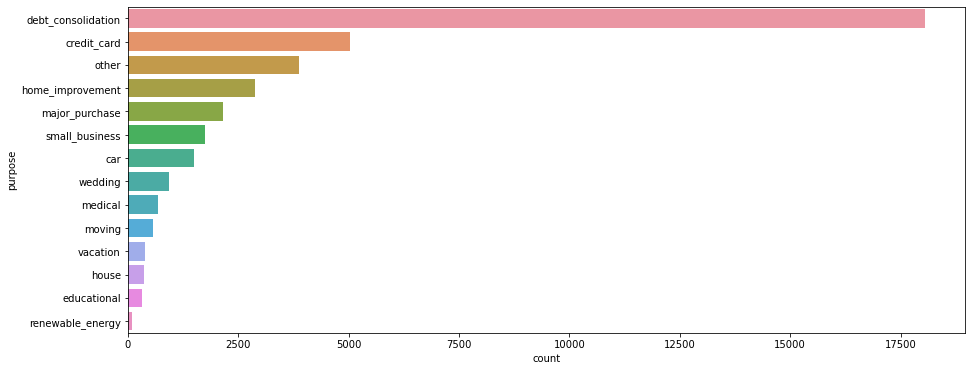

In [110]:
plt.figure(figsize=(15,6))
sns.countplot(y="purpose", data=df,order = df['purpose'].value_counts().sort_values(ascending=False).index)

## 4.2 Segmented Analysis of Default/Non default

In [111]:
catergorical_predictors = {'term','verification_status','home_ownership','grade','annual_inc_range','loan_to_annual_inc_range'}
catergorical_predictors2 = {'purpose','emp_length'}

### 4.2.1 Default/Paid vs Employee experience

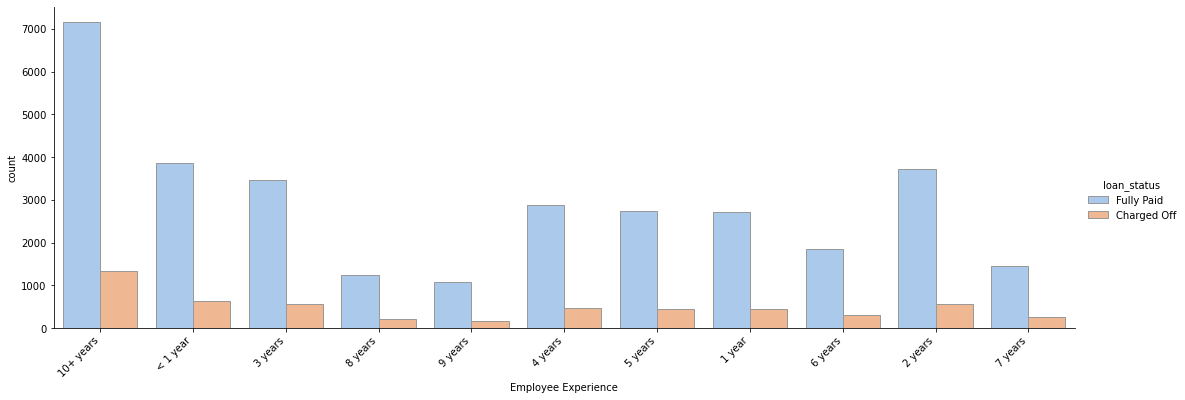

In [112]:
a = sns.catplot(x='emp_length', hue='loan_status', kind="count",
            palette="pastel", edgecolor=".6",aspect = 3,
            data=df)
plt.xlabel('Employee Experience')
for axes in a.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45,horizontalalignment='right')

### 4.2.2 Default/Paid vs Purpose

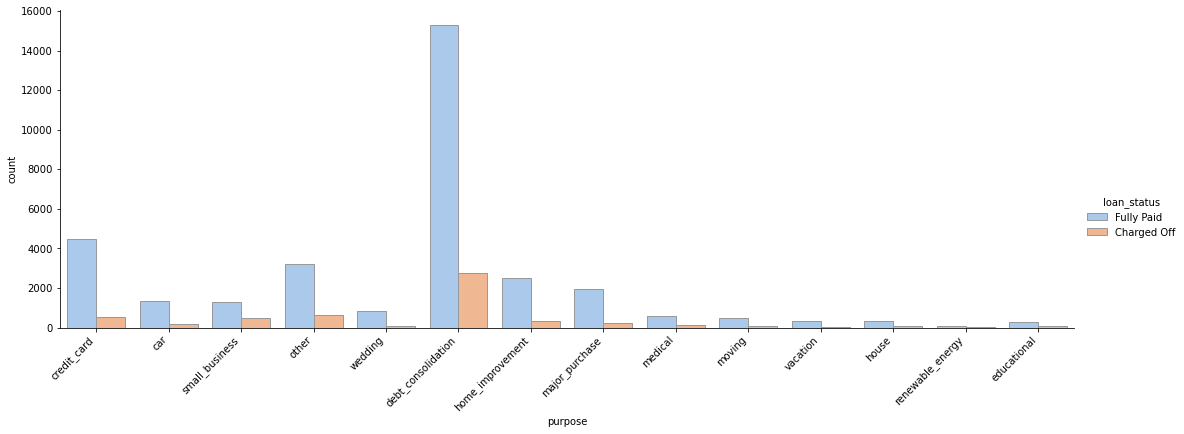

In [113]:
a = sns.catplot(x='purpose', hue='loan_status', kind="count",
            palette="pastel", edgecolor=".6",aspect = 3,
            data=df)
for axes in a.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45,horizontalalignment='right')

### 4.2.3 Default/Paid vs [term,verification_status,home_ownership,grade,annual_inc_range,loan_to_annual_inc_range]

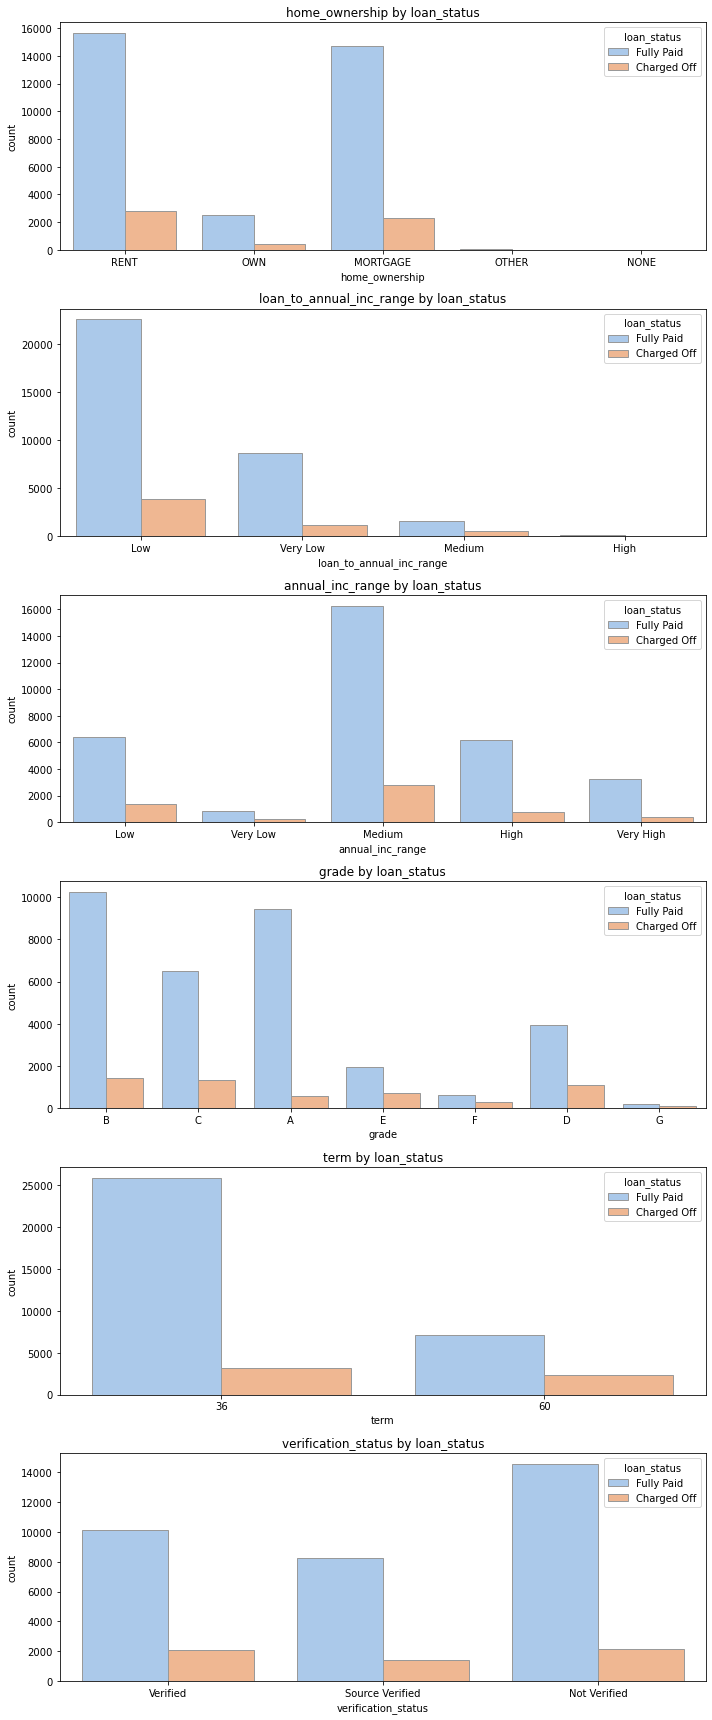

In [114]:
def plotCountsOnY(predictors):
    fig, axes = plt.subplots(nrows=len(predictors), ncols=1, figsize=(10, 4 * len(predictors)))

    for i, col in enumerate(predictors):
        ax = axes[i] if len(predictors) > 1 else axes
        sns.countplot(x=col, hue='loan_status', palette="pastel", edgecolor=".6", data=df, ax=ax)
        ax.set_title(f'{col} by loan_status')

    # Adjust layout
    plt.tight_layout()

    # Display the plots
    plt.show()


plotCountsOnY(catergorical_predictors)

## 4.2.4 Top defaulters in each variable

In [115]:
print(df['default'].sum())

5627


### Total Defaulters = 5627

In [116]:
def dafaulterPattern(predictors):
        for i,col in enumerate(predictors):
            term_pivot= pd.pivot_table(df,index=[col],values=['default'],aggfunc='sum')
            data = term_pivot['default'].sort_values(ascending =False).head(2)
            print(data.head(2))
            print('\n')
dafaulterPattern(catergorical_predictors.union(catergorical_predictors2))

grade
B    1425
C    1347
Name: default, dtype: int64


annual_inc_range
Medium    2820
Low       1368
Name: default, dtype: int64


home_ownership
RENT        2839
MORTGAGE    2327
Name: default, dtype: int64


emp_length
10+ years    1331
< 1 year      639
Name: default, dtype: int64


term
36    3227
60    2400
Name: default, dtype: int64


purpose
debt_consolidation    2767
other                  633
Name: default, dtype: int64


verification_status
Not Verified    2142
Verified        2051
Name: default, dtype: int64


loan_to_annual_inc_range
Low         3910
Very Low    1106
Name: default, dtype: int64




#### Top defaulters in different variables

Loan to annual income - <font color='blue'>Low(3910)</font><br>
Purpose - <font color='blue'>Debt consolidation(2767)</font> <br>
Employee experience - <font color='blue'>> 10 years(1331)</font><br>

Annual Income – <font color='blue'>Medium(2820) and Low(1368)</font><br>
Term – <font color='blue'>36 months (3227) and 60 months (2400)</font><br>
Verification status – <font color='blue'>Not verified(2142) and Verified(2041)</font><br>
Home ownership – <font color='blue'>Rent(2839) and Mortgage(2327)</font><br>

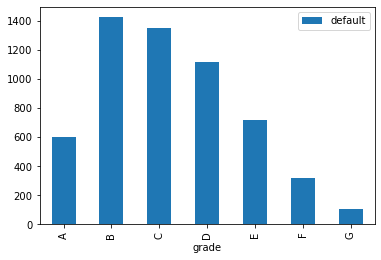

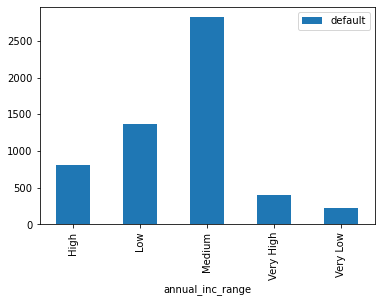

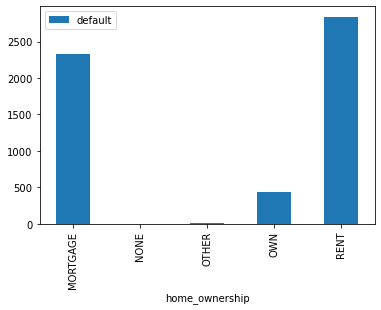

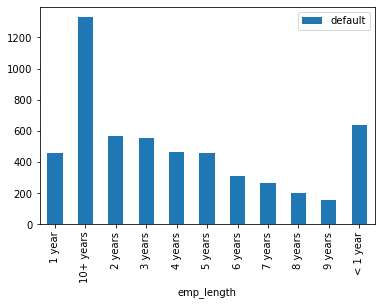

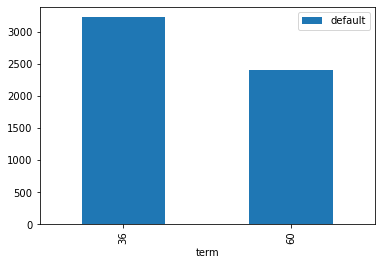

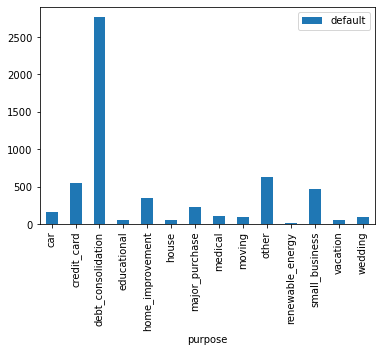

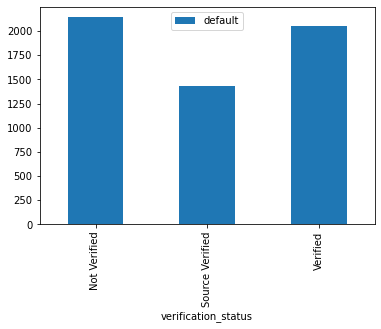

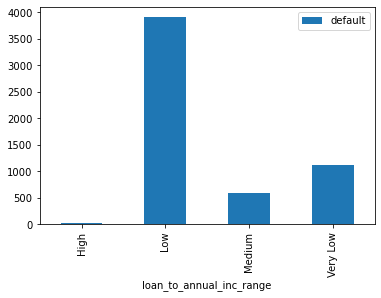

In [119]:
def dafaulterPattern(predictors):
        
        for i,col in enumerate(predictors):
            term_pivot= pd.pivot_table(df,index=[col],values=['default'],aggfunc='sum')
            term_pivot.plot.bar()            

dafaulterPattern(catergorical_predictors.union(catergorical_predictors2))

## Top 3 probable defaulters 

Purpose – Debt Consolidation <br>
Loan to annual income range - Low<br>
Employee experience  > 10 years <br>

## 4.3 Analysis of Probable defaulters vs other variables

### 4.3.1 Debt consolidation vs other variables

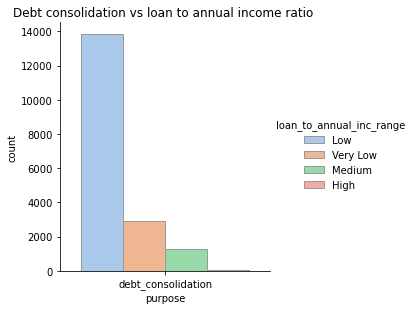

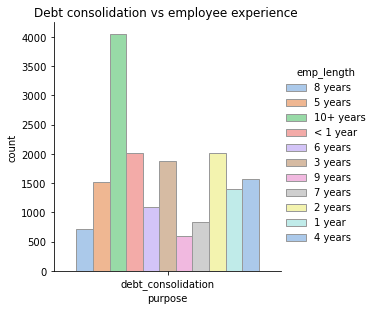

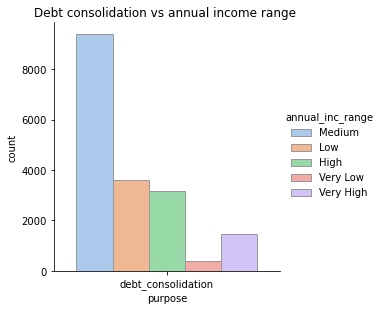

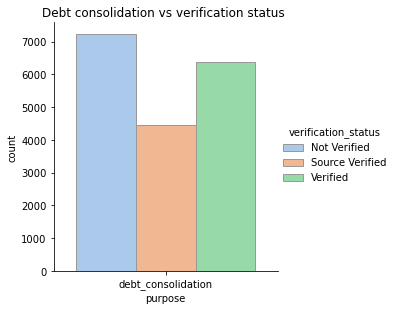

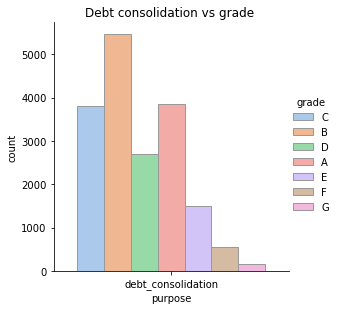

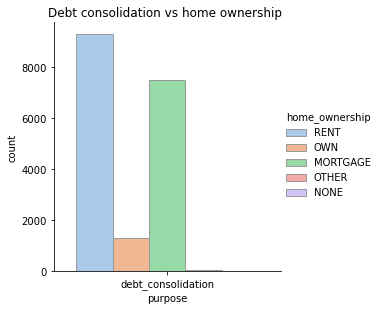

In [124]:
debtConsolidationDf = df[(df['purpose'] == 'debt_consolidation')]
def debtConsolidation(dic):
    for key in dic.keys():
        sns.catplot(x='purpose', hue=key, kind="count",
            palette="pastel", edgecolor=".6",height = 4,
            data=debtConsolidationDf)
        plt.title(dic[key])
a = 'Debt consolidation vs {0} '
dic = {'loan_to_annual_inc_range':a.format('loan to annual income ratio'),
       'emp_length':a.format('employee experience'),
       'annual_inc_range':a.format('annual income range'),
       'verification_status':a.format('verification status'),
       'grade':a.format('grade'),
       'home_ownership':a.format('home ownership')
      }
debtConsolidation(dic)

### Analysis for Home Ownership and verification status for debt consolidation

default                         
verification_status Not Verified Source Verified Verified
home_ownership                                           
MORTGAGE                   347.0           240.0    558.0
NONE                         0.0             NaN      NaN
OTHER                        5.0             0.0      2.0
OWN                         75.0            51.0     68.0
RENT                       514.0           393.0    514.0

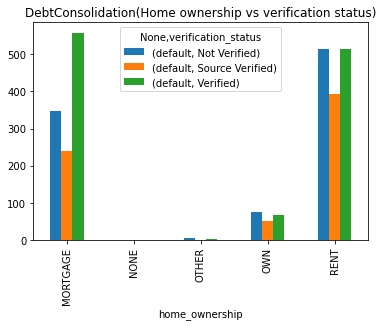

In [125]:
p1 = pd.pivot_table(debtConsolidationDf,index='home_ownership',columns=['verification_status'],values=['default'],aggfunc='sum')
p1.plot.bar()
plt.title('DebtConsolidation(Home ownership vs verification status)')
p1.head()

### Analysis for Term and Grade for debt consolidation

default                             
grade       A    B    C    D    E    F   G
term                                      
36        227  422  398  302   84   28   8
60         16  214  240  288  322  171  47

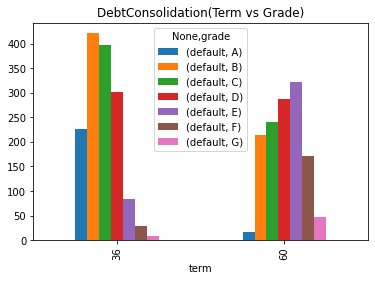

In [126]:
p1 = pd.pivot_table(debtConsolidationDf,index='term',columns=['grade'],values=['default'],aggfunc='sum')
p1.plot.bar()
plt.title('DebtConsolidation(Term vs Grade)')
p1.head()

### Analysis for Grade and sub grade for debt consolidation

default                        
grade           A   B   C   D   E   F   G
sub_grade                                
A1           10.0 NaN NaN NaN NaN NaN NaN
A2           34.0 NaN NaN NaN NaN NaN NaN
A3           43.0 NaN NaN NaN NaN NaN NaN
A4           77.0 NaN NaN NaN NaN NaN NaN
A5           79.0 NaN NaN NaN NaN NaN NaN

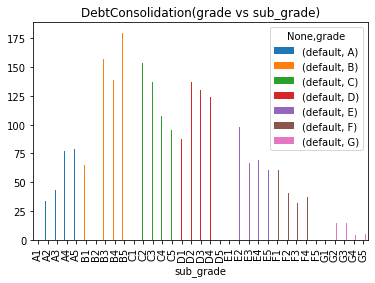

In [127]:
p1 = pd.pivot_table(debtConsolidationDf,index='sub_grade',columns=['grade'],values=['default'],aggfunc='sum')
p1.plot.bar()
plt.title('DebtConsolidation(grade vs sub_grade)')
p1.head()

# 5. Conclusion
## Driving factors of default
#### Purpose : <font color = 'blue'>Debt Consolidation</font>
##### Loan to annual income ratio : <font color = 'blue'>Low(10-40%)</font>
##### Employee experience  : <font color = 'blue'>>10 years</font>
##### Annual income range : <font color = 'blue'>Medium(40K-80K)</font>
##### Home ownership and Verification status : <font color = 'blue'>Rent (Verified and Not Verified) and Mortgage (Verified)</font>
##### Sub Grades : <font color = 'blue'>B3,B4,B5,C2,C3,D2,D3,D4</font>